# Chuẩn bị môi trường

In [2]:
#Kết nối đến Google Driver
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile

# Đường dẫn tới file zip cần giải nén
zip_file_path = '/content/drive/MyDrive/DL&ML/GA_CNN/drive-download-20240706T193229Z-001.zip'

# Đường dẫn để giải nén
extract_to_path = '/content/drive/MyDrive/DL&ML/GA_CNN'

# Giải nén file zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print("Đã giải nén thành công!")

In [ ]:
# Chuyển đến thư mục chứa các file Python
import os
os.chdir('/content/drive/MyDrive/DL&ML/GA_CNN')

# Kiểm tra các file trong thư mục hiện tại
!ls


# Tải Cifar10 dataset & tiền xử lý

In [4]:
from keras.datasets import cifar10
from keras.utils import to_categorical

def load_dataset(batch_size, num_classes, epochs):
    print("Đang tải dữ liệu CIFAR-10...")
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    print("Dữ liệu đã được tải thành công.")

    print("Đang chuyển đổi kiểu dữ liệu...")
    x_train = x_train.astype('float32')  # chuyển từ số nguyên sang số thực
    x_test = x_test.astype('float32')

    print("Đang chuẩn hóa dữ liệu về khoảng 0-1...")
    x_train /= 255  # chuẩn hóa về khoảng 0-1
    x_test /= 255

    print("Đang thực hiện mã hóa one-hot cho nhãn...")
    y_train = to_categorical(y_train, num_classes)  # mã hóa one-hot cho nhãn
    y_test = to_categorical(y_test, num_classes)

    dataset = {
        'batch_size': batch_size,
        'num_classes': num_classes,
        'epochs': epochs,
        'x_train': x_train,
        'x_test': x_test,
        'y_train': y_train,
        'y_test': y_test
    }

    print("Chuẩn bị dữ liệu hoàn thành.")
    return dataset


# Cài đặt tham số

In [5]:
# Cài đặt các tham số
batch_size = 32                         # số lượng mẫu trong một forward/backward pass
num_classes = 10                        # số lớp của bộ dữ liệu CIFAR-10
epochs = 3                             # số lần lặp forward và backward của tất cả các mẫu đào tạo
num_epoch = 3                           # số lượng epoch cho quá trình huấn luyện cuối cùng
dataset = load_dataset(batch_size, num_classes, epochs)


num_population = 4                     # kích thước dân số
num_generation = 4                     # số thế hệ
num_offspring = 4                      # số con
resume_from_checkpoint = None           # đường dẫn đến checkpoint nếu muốn tiếp tục từ checkpoint

# In các tham số để xác nhận
print(f'batch_size: {batch_size}')
print(f'num_classes: {num_classes}')
print(f'epochs: {epochs}')
print(f'num_population: {num_population}')
print(f'num_generation: {num_generation}')
print(f'num_offspring: {num_offspring}')
print(f'resume_from_checkpoint: {resume_from_checkpoint}')


Đang tải dữ liệu CIFAR-10...
Dữ liệu đã được tải thành công.
Đang chuyển đổi kiểu dữ liệu...
Đang chuẩn hóa dữ liệu về khoảng 0-1...
Đang thực hiện mã hóa one-hot cho nhãn...
Chuẩn bị dữ liệu hoàn thành.
batch_size: 32
num_classes: 10
epochs: 3
num_population: 4
num_generation: 4
num_offspring: 4
resume_from_checkpoint: None


# Main

Đang tải dữ liệu CIFAR-10...
Dữ liệu đã được tải thành công.
Đang chuyển đổi kiểu dữ liệu...
Đang chuẩn hóa dữ liệu về khoảng 0-1...
Đang thực hiện mã hóa one-hot cho nhãn...
Chuẩn bị dữ liệu hoàn thành.
Thuật toán Di truyền
----->Khởi tạo Quần thể
Đang tải parent_0
Tóm tắt parent_0
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                    

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Tạo Ra Con cái 1
----->Lựa chọn Tournament
Chọn net_2 và parent_0 để sinh sản
----->Sự Giao thoa
Đã tạo ra Con cái
----->Đột biến Nhẹ
Đột biến lớp
Tách lớp Conv2D tại index 0
Đột biến thông số
Đột biến lớp Conv2D :
--> thay đổi self.filters từ  32  thành 16
Đột biến lớp AveragePooling2D :
--> thay đổi self.name từ  AveragePooling2D  thành MaxPooling2D
Đột biến lớp Conv2D :
--> thay đổi self.filters từ  128  thành 256
Đột biến lớp Conv2D :
Đột biến lớp FullyConnected :
--> thay đổi self.units từ  128  thành 256
Đã đột biến Con cái
Đang huấn luyện net_5
Epoch 1/3
1563/1563 [==============================] - 20s 10ms/step - loss: 1.7733 - accuracy: 0.3503 - val_loss: 1.4274 - val_accuracy: 0.4876
Epoch 2/3
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2446 - accuracy: 0.5614 - val_loss: 1.1673 - val_accuracy: 0.5971
Epoch 3/3
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0222 - accuracy: 0.6446 - val_loss: 1.0588 - val_accuracy: 0.6566
TÓM TẮ

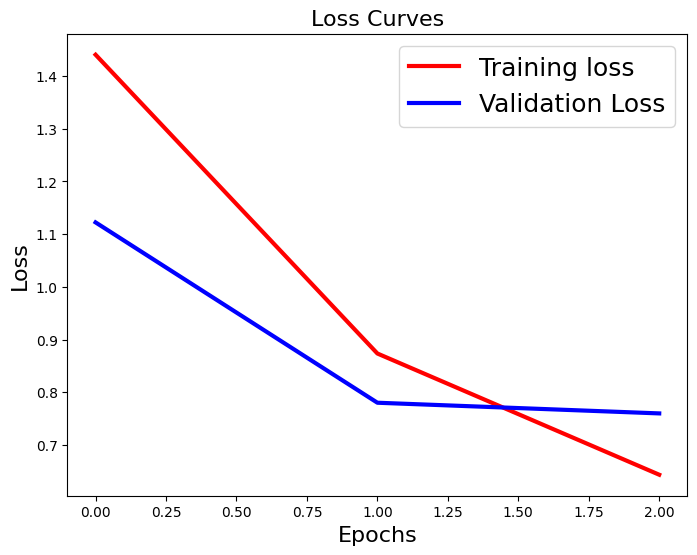

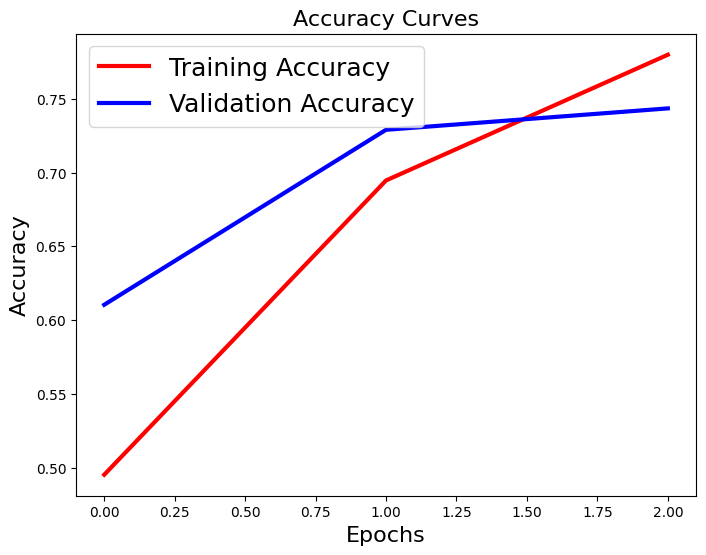

In [6]:
import tensorflow as tf
import os
from network import Network
from inout import compute_parent
from random import randint, sample
from utilities import order_indexes, plot_training, plot_statistics, load_network, save_network
from copy import deepcopy

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)      # Tắt các thông báo từ Tensorflow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


def initialize_population(population_size, dataset):
    print("----->Khởi tạo Quần thể")
    daddy = compute_parent(dataset)                                 # Tải cá thể cha mẹ từ đầu vào
    population = [daddy]
    for it in range(1, population_size):
        population.append(daddy.asexual_reproduction(it, dataset))

    # Sắp xếp quần thể theo thứ tự tăng dần dựa trên độ thích nghi (fitness)
    return sorted(population, key=lambda cnn: cnn.fitness)


def selection(k, population, num_population):
    if k == 0:                                              # Lựa chọn bảo toàn
        print("----->Lựa chọn Elitism")
        return population[0], population[1]
    elif k == 1:                                            # Lựa chọn giải đấu
        print("----->Lựa chọn Tournament")
        i = randint(0, num_population - 1)
        j = i
        while j < num_population - 1:
            j += 1
            if randint(1, 100) <= 50:
                return population[i], population[j]
        return population[i], population[0]
    else:                                                   # Lựa chọn tỷ lệ
        print("----->Lựa chọn Proportionate")
        cum_sum = 0
        for i in range(num_population):
            cum_sum += population[i].fitness
        perc_range = []
        for i in range(num_population):
            count = 100 - int(100 * population[i].fitness / cum_sum)
            for j in range(count):
                perc_range.append(i)
        i, j = sample(range(1, len(perc_range)), 2)
        while i == j:
            i, j = sample(range(1, len(perc_range)), 2)
        return population[perc_range[i]], population[perc_range[j]]


def crossover(parent1, parent2, it):
    print("----->Sự Giao thoa")
    child = Network(it)

    first, second = None, None
    if randint(0, 1):
        first = parent1
        second = parent2
    else:
        first = parent2
        second = parent1

    child.block_list = deepcopy(first.block_list[:randint(1, len(first.block_list) - 1)]) \
                       + deepcopy(second.block_list[randint(1, len(second.block_list) - 1):])

    order_indexes(child)                            # Sắp xếp các chỉ số của các khối

    return child


def genetic_algorithm(num_population, num_generation, num_offspring, dataset, resume_from_checkpoint=None):
    print("Thuật toán Di truyền")

    population = initialize_population(num_population, dataset)

    # Lưu mô hình ban đầu
    save_network(population[0], 'initial_model')

    if resume_from_checkpoint:
        # Tải mô hình từ checkpoint nếu có
        print(f"Tiếp tục từ điểm kiểm soát: {resume_from_checkpoint}")
        model = tf.keras.models.load_model(resume_from_checkpoint)
        # Cập nhật cá thể ban đầu với mô hình đã tải
        population[0].model = model
        population[0].train_and_evaluate(model, dataset)

    print("\n-------------------------------------")
    print("Quần thể Ban đầu:")
    for cnn in population:
        print(cnn.name, ': ', cnn.fitness)
    print("--------------------------------------\n")

    # Để in thống kê về độ thích nghi và số lượng tham số của cá thể tốt nhất
    stats = [(population[0].fitness, population[0].model.count_params())]

    for gen in range(1, num_generation + 1):

        '''
            k là tham số lựa chọn:
                k = 0 -> Lựa chọn elitism
                k = 1 -> Lựa chọn tournament
                k = 2 -> Lựa chọn proportionate
        '''
        k = randint(0, 2)

        print("\n------------------------------------")
        print("Thế hệ", gen)
        print("-------------------------------------")

        for c in range(num_offspring):

            print("\nTạo Ra Con cái", c)

            parent1, parent2 = selection(k, population, num_population)                 # Lựa chọn
            print("Chọn", parent1.name, "và", parent2.name, "để sinh sản")

            child = crossover(parent1, parent2, c + num_population)                     # Giao thoa
            print("Đã tạo ra Con cái")

            print("----->Đột biến Nhẹ")
            child.layer_mutation(dataset)                                               # Đột biến
            child.parameters_mutation()
            print("Đã đột biến Con cái")

            model = child.build_model()                                                 # Đánh giá

            while model == -1:
                child = crossover(parent1, parent2, c + num_population)
                child.block_mutation(dataset)
                child.layer_mutation(dataset)
                child.parameters_mutation()
                model = child.build_model()

            child.train_and_evaluate(model, dataset)

            if child.fitness < population[-1].fitness:                                  # Tiến hóa quần thể
                print("----->Tiến hóa: Con cái", child.name, "với độ thích nghi", child.fitness, "thay thế cha mẹ ", end="")
                print(population[-1].name, "với độ thích nghi", population[-1].fitness)
                name = population[-1].name
                population[-1] = deepcopy(child)
                population[-1].name = name
                population = sorted(population, key=lambda net: net.fitness)
            else:
                print("----->Tiến hóa: Con cái", child.name, "với độ thích nghi", child.fitness, "bị loại bỏ")

        stats.append((population[0].fitness, population[0].model.count_params()))

        # Lưu checkpoint sau mỗi thế hệ
        checkpoint_dir = './checkpoints'
        os.makedirs(checkpoint_dir, exist_ok=True)
        checkpoint_path = os.path.join(checkpoint_dir, f'generation_{gen}.h5')
        population[0].model.save(checkpoint_path)

    print("\n\n-------------------------------------")
    print("Quần thể Cuối cùng")
    print("-------------------------------------\n")
    for cnn in population:
        print(cnn.name, ': ', cnn.fitness)

    print("\n-------------------------------------")
    print("Thống kê")
    for i in range(len(stats)):
        print("Cá thể tốt nhất ở thế hệ", i + 1, "có độ thích nghi", stats[i][0], "và số lượng tham số", stats[i][1])
    print("-------------------------------------\n")

    # Vẽ biểu đồ về độ thích nghi và số lượng tham số của cá thể tốt nhất ở mỗi vòng lặp
    plot_statistics(stats)

    return population[0]


def main():
    '''
        dataset chứa các siêu tham số để tải dữ liệu và tập dữ liệu:
            dataset = {
                'batch_size': batch_size,
                'num_classes': num_classes,
                'epochs': epochs,
                'x_train': x_train,
                'x_test': x_test,
                'y_train': y_train,
                'y_test': y_test
            }
    '''
    dataset = load_dataset(batch_size, num_classes, epochs)
    resume_from_checkpoint = None  # Đặt lại thành đường dẫn của checkpoint nếu bạn muốn tiếp tục từ checkpoint

    # Vẽ biểu đồ về mô hình tốt nhất thu được
    optCNN = genetic_algorithm(num_population, num_generation, num_offspring, dataset, resume_from_checkpoint)
    # Load mô hình ban đầu và vẽ đồ thị từ nó
    initial_model = load_network('initial_model')
    initial_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    initial_history = initial_model.model.fit(dataset['x_train'],
                                              dataset['y_train'],
                                              batch_size=dataset['batch_size'],
                                              epochs=num_epoch,
                                              validation_data=(dataset['x_test'], dataset['y_test']),
                                              shuffle=True)


    # Vẽ biểu đồ về sự mất mát và độ chính xác trong quá trình huấn luyện và xác thực
    model = optCNN.build_model()
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(dataset['x_train'],
                        dataset['y_train'],
                        batch_size=dataset['batch_size'],
                        epochs=num_epoch,
                        validation_data=(dataset['x_test'], dataset['y_test']),
                        shuffle=True)
    optCNN.model = model                                        # model
    optCNN.fitness = history.history['val_loss'][-1]            # fitness

    print("\n\n-------------------------------------")
    print("CNN ban đầu đã được tiến hóa thành công trong các cá thể", optCNN.name)
    print("-------------------------------------\n")
    daddy = load_network('parent_0')
    model = tf.keras.models.load_model('parent_0.h5')
    print("\n\n-------------------------------------")
    print("Tóm tắt của CNN ban đầu")
    print(model.summary())
    print("Fitness của CNN ban đầu:", daddy.fitness)

    print("\n\n-------------------------------------")
    print("Tóm tắt của cá nhân tiến hóa")
    print(optCNN.model.summary())
    print("Fitness của cá nhân tiến hóa:", optCNN.fitness)
    print("-------------------------------------\n")

    plot_training(initial_history)      # Vẽ đồ thị mất mát và độ chính xác từ mô hình ban đầu
    plot_training(history)


if __name__ == '__main__':
    main()
